In [37]:
#basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#data aquisition
from sklearn import datasets
iris = datasets.load_iris()


In [18]:
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
trgt = pd.DataFrame(iris.target,columns=["Label"])
iris_df = pd.concat([iris_df,trgt],axis=1)


In [19]:
#dataframe for iris dataset
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
#info and description
iris_df.info()
#all are non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [22]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

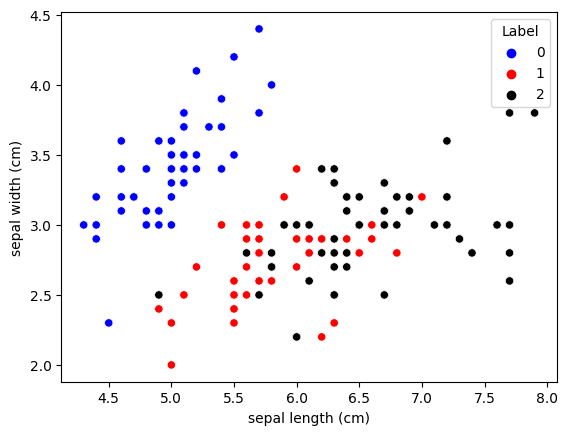

In [47]:
#visualising
#checking scatter of sepal ln vs sepal wdth
sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)",data=iris_df,hue="Label",palette=["blue","red","black"],edgecolor="white")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

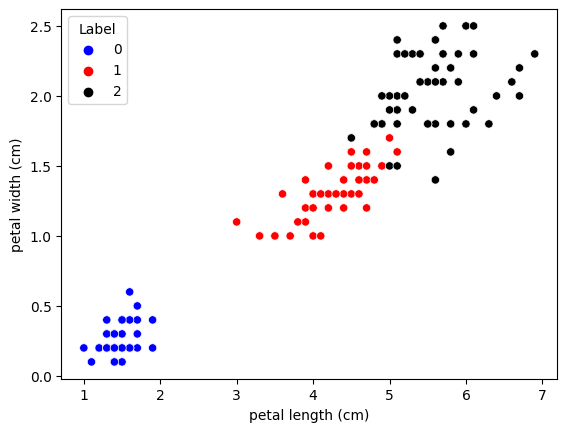

In [44]:
#checking scatter of petal ln vs petal wdth
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",data=iris_df,hue="Label",palette=["blue","red","black"],edgecolor="white")

In [52]:
#pre processing dataset
from sklearn.preprocessing import StandardScaler
st_scl = StandardScaler()
st_scl.fit(iris_df.drop("Label",axis=1))
iris_st = st_scl.transform(iris_df.drop("Label",axis=1))

In [54]:
X = iris_st
y = iris_df["Label"]

In [71]:
#data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [73]:
#finding metrics for k = 1
knn = KNeighborsClassifier(n_neighbors = 1)

In [74]:
#fitting model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [75]:
#testing
predictions = knn.predict(X_test)

In [76]:
#metrics
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      1.00      0.95        19
           2       1.00      0.82      0.90        11

    accuracy                           0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



In [77]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 19  0]
 [ 0  2  9]]


In [81]:
# finding best value of k
error_rate=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(y_test != predictions))


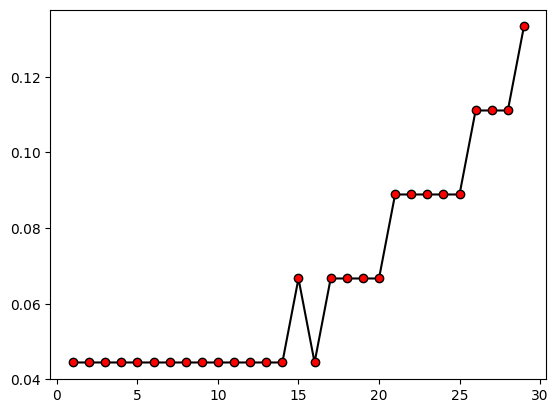

In [86]:
#plotting k values
plt.plot(range(1,30),error_rate,color="black",linestyle="-",marker="o",markerfacecolor="red")
#constant  value for k 1,10
#taking value as k=5


In [84]:
#final training and test
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)


In [85]:
#metrics
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      1.00      0.95        19
           2       1.00      0.82      0.90        11

    accuracy                           0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45

[[15  0  0]
 [ 0 19  0]
 [ 0  2  9]]
